<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/DeepLearning/MNIST/Keras_220921_MNIST_%EC%8B%A4%EC%8A%B505_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s /content/drive/MyDrive /mydrive

In [3]:
%cd /mydrive

/content/drive/MyDrive


In [4]:
!mkdir mnist

mkdir: cannot create directory ‘mnist’: File exists


## __배치정규화 일괄적용__
--

Batch_normalization 추가

In [5]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [8]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [9]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

#### __1. BatchNormalization, 출력 직전층 activation='sigmoid', optimizer='rmsprop'__ 

In [10]:
model_1_1 = keras.Sequential()
model_1_1.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('relu'))
model_1_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1_1.add(layers.Dropout(0.2))
model_1_1.add(layers.Conv2D(64, (3, 3)))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('relu'))
model_1_1.add(layers.MaxPooling2D((2,2)))
model_1_1.add(layers.Dropout(0.2))
model_1_1.add(layers.Conv2D(128, (3, 3)))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('relu'))
model_1_1.add(layers.Dropout(0.5))
model_1_1.add(layers.Flatten())
model_1_1.add(layers.Dense(64))
model_1_1.add(layers.BatchNormalization())
model_1_1.add(layers.Activation('sigmoid'))
model_1_1.add(layers.Dense(10, activation="softmax"))

model_1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        1

In [11]:
model_1_1.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [12]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try05_3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_1 = model_1_1.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
371/375 [============================>.] - ETA: 0s - loss: 0.4658 - accuracy: 0.9412
Epoch 1: val_accuracy improved from -inf to 0.12533, saving model to mnist/try05_3.h5
375/375 [==============================] - 16s 9ms/step - loss: 0.4624 - accuracy: 0.9416 - val_loss: 2.3458 - val_accuracy: 0.1253
Epoch 2/100
372/375 [============================>.] - ETA: 0s - loss: 0.0894 - accuracy: 0.9809
Epoch 2: val_accuracy improved from 0.12533 to 0.98650, saving model to mnist/try05_3.h5
375/375 [==============================] - 3s 7ms/step - loss: 0.0892 - accuracy: 0.9809 - val_loss: 0.0471 - val_accuracy: 0.9865
Epoch 3/100
372/375 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9849
Epoch 3: val_accuracy improved from 0.98650 to 0.98908, saving model to mnist/try05_3.h5
375/375 [==============================] - 3s 8ms/step - loss: 0.0563 - accuracy: 0.9849 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 4/100
370/375 [============================>.

In [13]:
result = model_1_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0199 - accuracy: 0.9950

테스트 정확도: 0.9950


In [14]:
loaded_model = load_model('mnist/try05_3.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9949

불러온 모델 테스트 정확도: 0.9949


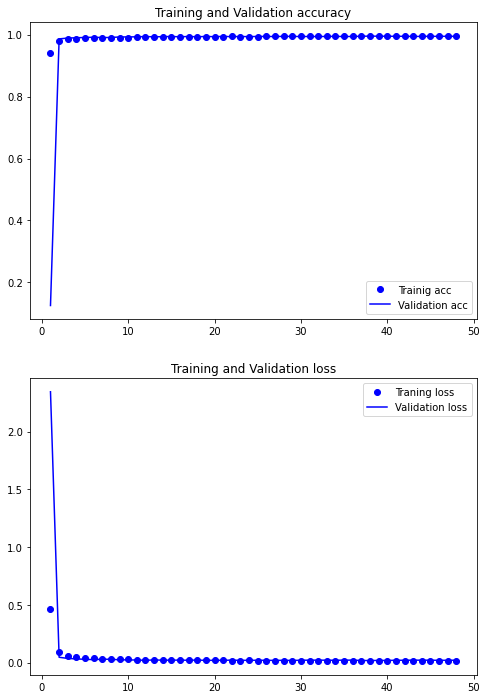

In [15]:
acc = hist_1_1.history['accuracy']
val_acc = hist_1_1.history['val_accuracy']
loss = hist_1_1.history['loss']
val_loss = hist_1_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [16]:
df = pd.DataFrame([['CNN', 'model_1_1', '32(relu/batchnomalization/drop0.2)-64(relu/batchnomalization/drop0.2)-128(relu/batchnomalization/drop0.5)-Flatten-64(relu)-10(softmax)]',
                    'rmsprop', 100, 128, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]],
                  columns=['모델', 'Name', 'Structure', 'Optimizer', 'epochs', 'batch_size', 'validation_split', 'callback', 'Accuracy', 'MC_Accuracy', 'Loss', 'MC_Loss'])

#### __3.  batch_size=128, 출력 직전층 activation='sigmoid', optimizer='adam'__ 

In [17]:
model_1_2 = keras.Sequential()
model_1_2.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('relu'))
model_1_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1_2.add(layers.Dropout(0.2))
model_1_2.add(layers.Conv2D(64, (3, 3)))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('relu'))
model_1_2.add(layers.MaxPooling2D((2,2)))
model_1_2.add(layers.Dropout(0.2))
model_1_2.add(layers.Conv2D(128, (3, 3)))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('relu'))
model_1_2.add(layers.Dropout(0.5))
model_1_2.add(layers.Flatten())
model_1_2.add(layers.Dense(64))
model_1_2.add(layers.BatchNormalization())
model_1_2.add(layers.Activation('sigmoid'))
model_1_2.add(layers.Dense(10, activation="softmax"))

model_1_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)       

In [18]:
model_1_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try05_4.h5', monitor='val_accuracy', mode='max', verbose=1)
hist_1_2 = model_1_2.fit(train_imgs, train_labels, epochs=100, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
367/375 [============================>.] - ETA: 0s - loss: 0.6012 - accuracy: 0.9108
Epoch 1: saving model to mnist/try05_4.h5
375/375 [==============================] - 4s 8ms/step - loss: 0.5929 - accuracy: 0.9122 - val_loss: 2.3016 - val_accuracy: 0.1328
Epoch 2/100
374/375 [============================>.] - ETA: 0s - loss: 0.1406 - accuracy: 0.9787
Epoch 2: saving model to mnist/try05_4.h5
375/375 [==============================] - 3s 7ms/step - loss: 0.1406 - accuracy: 0.9787 - val_loss: 0.0703 - val_accuracy: 0.9878
Epoch 3/100
367/375 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9834
Epoch 3: saving model to mnist/try05_4.h5
375/375 [==============================] - 3s 7ms/step - loss: 0.0808 - accuracy: 0.9836 - val_loss: 0.0437 - val_accuracy: 0.9903
Epoch 4/100
372/375 [============================>.] - ETA: 0s - loss: 0.0599 - accuracy: 0.9862
Epoch 4: saving model to mnist/try05_4.h5
375/375 [==============================] - 3s 7ms/s

In [20]:
result = model_1_2.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9944

테스트 정확도: 0.9944


In [21]:
loaded_model = load_model('mnist/try05_4.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0207 - accuracy: 0.9944

불러온 모델 테스트 정확도: 0.9944


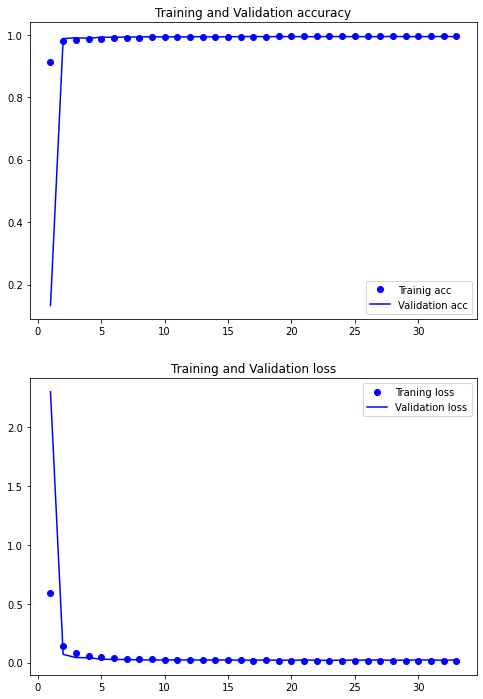

In [22]:
acc = hist_1_2.history['accuracy']
val_acc = hist_1_2.history['val_accuracy']
loss = hist_1_2.history['loss']
val_loss = hist_1_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [23]:
df.loc[1]=['CNN', 'model_1_2', '32(relu/batchnomalization/drop0.2)-64(relu/batchnomalization/drop0.2)-128(relu/batchnomalization/drop0.5)-Flatten-64(relu)-10(softmax)]', 'adam', 100, 128, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

In [24]:
df.head()

,모델,Name,Structure,Optimizer,epochs,batch_size,validation_split,callback,Accuracy,MC_Accuracy,Loss,MC_Loss
0,CNN,model_1_1,32(relu/batchnomalization/drop0.2)-64(relu/bat...,rmsprop,100,128,0.2,es/mc,0.9950,0.9949,0.0199,0.0181
1,CNN,model_1_2,32(relu/batchnomalization/drop0.2)-64(relu/bat...,adam,100,128,0.2,es/mc,0.9944,0.9944,0.0207,0.0207


In [25]:
df.to_csv("./mnist/220921_실습_5_1.csv", header=True, sep=',', na_rep='NaN', float_format = '%.4f', encoding='utf-8-sig', line_terminator='\n')